# Web Scraping

In [117]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import pandas as pd

url = 'https://finviz.com/quote.ashx?t={symbol}'
headers={'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) \
               AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.138 Safari/537.36'}
website = requests.get(url=url.format(symbol='tsla'), headers=headers)
soup = BeautifulSoup(website.text, 'lxml')
news = soup.find(id='news-table')
rows = news.findAll('tr')

In [118]:
last_date = ''
df = pd.DataFrame([],columns=['Date','Title'])
for i, row in enumerate(rows):
    cols = row.findAll('td')
    date = cols[0].text
    title = cols[1].a.text
    newsTime = date.split()
    if len(newsTime)==2:
        last_date = newsTime[0]
        newsTime = ' '.join(newsTime)
    else:
        newsTime = last_date+' '+newsTime[0]
    newsTime = datetime.strptime(newsTime, '%b-%d-%y %I:%M%p')
    df2 = pd.DataFrame([[newsTime, title]],columns=['Date','Title'])
    df = df.append(df2)
df = df.reset_index(drop=True)

# Sentiment Analysis

In [119]:
import nltk
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/tianningli/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [120]:
senti = SentimentIntensityAnalyzer()
def get_sentiment_score(review):
    try:
        compound_score = senti.polarity_scores(review)['compound']
        return compound_score
    except:
        return "error"
df["Sentiment_score"] = df["Title"].apply(get_sentiment_score)
df2 = df[df['Sentiment_score']!=0]
df2.head()

,Date,Title,Sentiment_score
1,2020-07-22 19:32:00,Musk Promises Giant Contract for Efficiently M...,0.6486
2,2020-07-22 19:06:00,Elon Musk's Tesla Rises on 4th Consecutive GAA...,0.4404
3,2020-07-22 19:03:00,Tesla stock soars more than 5% after company r...,0.6124
4,2020-07-22 18:54:00,S&P 500 News: Tesla's Profit Sets It Up to Joi...,0.6249
8,2020-07-22 18:13:00,Tesla Earnings: Strong Results and an Optimist...,0.6808


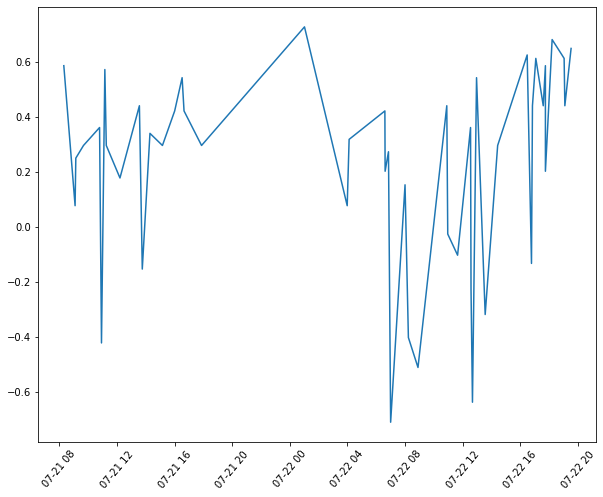

In [121]:
plt.figure(figsize=(10,8))
plt.plot('Date', 'Sentiment_score', data=df2)
plt.xticks(rotation=50)
plt.show()